# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$w_{new}=w_{old}-\alpha\nabla_{w}Q^*_r(w_{old}), \text{ где }$$
$$\nabla_{w}Q^*_r(w)=\frac{1}{n}\sum_{j=1}^n\nabla_{w}L(x_j\cdot w, y_j) + \frac{1}{C}\nabla_{w}\sum_{j=1}^{D}w_j^2=\frac{1}{n}\sum_{j=1}^n\nabla_{w}(x_j\cdot w - y_j)^2 + \frac{1}{C}\nabla_{w}w^2= \frac{2}{n}\sum_{j=1}^n(x_j\cdot w - y_j) x_j + \frac{2}{C}w$$
В матричном виде:
$$\nabla_{w}Q^*_r(w)=\frac{2}{n}X^T(Xw-y) + \frac{2}{C}w, \mbox{ где $X$ - матрица $n\times D$, $w$ - вектор $D\times 1$, $y$ - вектор $n\times 1$, $D$-кол-во фич.}$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$ w_{new} = w_{old} - \alpha\nabla_wQ^*_r(w_{old}), \text{ где } $$
$$\nabla_wQ^*_r(w) = \nabla_w\left( -\frac{1}{n}\left[\sum_{i=1}^n y_i\log\sigma(\langle\,x_i,w\rangle)+(1-y_i)\log(1-\sigma(\langle\,x_i,w\rangle))\right]+ \frac{1}{C}\sum_{j=1}^{D}w_j^2\right)=$$
$$=-\frac{1}{n}\left[\sum_{i=1}^n \nabla_wy_i\log\sigma(\langle\,x_i,w\rangle)+\nabla_w(1-y_i)\log(1-\sigma(\langle\,x_i,w\rangle))\right]+ \frac{2}{C}w$$

Посчитаем отдельно слагаемые:
$$\nabla_wy_i\log\sigma(\langle\,x_i,w\rangle)+\nabla_w(1-y_i)\log(1-\sigma(\langle\,x_i,w\rangle)=y_i\frac{\nabla_w\sigma(\langle\,x_i,w\rangle)}{\sigma(\langle\,x_i,w\rangle)}+(1-y_i)\frac{\nabla_w(1-\sigma(\langle\,x_i,w\rangle)}{1-\sigma(\langle\,x_i,w\rangle}$$

Рассмотрим градиент $\sigma(w)$:
$$\nabla_w\sigma(w) = \nabla_w\frac{1}{1 + e^{-w}}=\frac{e^{-w}}{\left(1 + e^{-w}\right)^2}=\sigma(w)\frac{e^{-w}}{\left(1 + e^{-w}\right)}=\sigma(w)(1-\sigma(w))$$

Соответственно градиент $\sigma(\langle\,x_i,w\rangle):$
$$\nabla_w\sigma(\langle\,x_i,w\rangle)=x_i\sigma(\langle\,x_i,w\rangle)(1-\sigma(\langle\,x_i,w\rangle))$$

Тогда общая формула принимает вид:
$$\nabla_wQ^*_r(w)=-\frac{1}{n}\left[\sum_{i=1}^n x_iy_i(1-\sigma(\langle\,x_i,w\rangle))-x_i(1-y_i)\sigma(\langle\,x_i,w\rangle)\right]+ \frac{2}{C}w=\frac{1}{n}\left[\sum_{i=1}^n x_i(\sigma(\langle\,x_i,w\rangle)-y_i)\right]+ \frac{2}{C}w$$
В матричном виде:
$$\nabla_{w}Q^*_r(w)=\frac{1}{n}X^T(\sigma(\langle X,w\rangle)-y) + \frac{2}{C}w, \mbox{ где $X$ - матрица $n\times D$, $w$ - вектор $D\times 1$, $y$ - вектор $n\times 1$, $D$-кол-во фич.}$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

**I.**
В модели линейной регрессии c квадратичной функцией потерь функционал качества принимал вид:
$$Q(X,w)=\frac{1}{N}\sum_{i=1}^N(x_i\cdot w - y_i)^2=\frac{1}{N}\Vert X\cdot w - y\Vert^2$$
На лекции мы посчитали первый градиент:
$$\nabla_wQ(X,w) = \frac{2}{N}X^T(Xw-y)$$
Для нахождения Гессиана возьмем второй градиент:
$$\nabla^2_wQ(X,w) = \nabla_w\frac{2}{N}X^T(Xw-y)=\frac{2}{N}X^TX$$
Из курса линейной алгебры знаем, что матрица вида $X^TX$ является матрицей Грама и одним из её свойств является положительная определенность, а это значит что по достаточному признаку найденный нами $w$ является минимумом.

**II.**
Функционал качества с $L2$ регуляризацией принимает вид:
$$Q_r(w)=\frac{1}{N}\sum_{i=1}^N(x_i\cdot w - y_i)^2+\frac{1}{C}\sum_{j=1}^Dw_j^2$$
Ищем точное решение:
$$\nabla_wQ_r(w)=\frac{1}{N}\sum_{i=1}^N\nabla_w(x_i\cdot w - y_i)^2+\frac{1}{C}\nabla_w\sum_{j=1}^Dw_j^2=
\frac{2}{N}\sum_{i=1}^Nx_i(x_i\cdot w - y_i)+\frac{2}{C}\sum_{j=1}^Dw_j=0$$
Запишем это уравнение в матричном виде:
$$\frac{2}{N}X^T(X\cdot w-y)+\frac{2}{C}w=0$$
$$w\left(\frac{1}{N}X^TX + \frac{1}{C}I\right)=\frac{1}{N}X^Ty$$
$$w=\left(X^TX + \frac{N}{C}I\right)^{-1}X^Ty$$
Таким образом с помощью регуляризации решается проблема обратимости матрицы $X^TX$.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
Найдем минимум, используя необходимый и достаточный признак экстремума:
$$E'_{x_i}(L | x_i) = -\frac{p(y_i = 1 |x_i )}{a(x_i)}+\frac{p(y_i=0|x_i)}{1-a(x_i)}=0$$
$$\frac{a(x_i)p(y_i=0|x_i) - (1-a(x_i))p(y_i=1|x_i)}{a(x_i)(1-a(x_i))}=0$$
$$\frac{a(x_i)p(y_i=0|x_i) - p(y_i=1|x_i) + a(x_i)p(y_i=1|x_i)}{a(x_i)(1-a(x_i))}=0$$
$$\frac{a(x_i)\overbrace{(p(y_i=0|x_i)+p(y_i=1|x_i))}^1 - p(y_i=1|x_i)}{a(x_i)(1-a(x_i))}=0$$
$$a(x) = p(y_i=1|x_i) - \text{ точка экстремума}$$
Убедимся, что это минимум:
$$E''_{x_ix_i}(L(p(y_i=1|x_i))|x_i)=\left(\frac{a(x_i)-p(y_i=1|x_i)}{a(x_i)(1-a(x_i))}\right)'_{x_i=p(y_i=1|x_i))}=\left(\frac{a^2(x_i)+p(y_i=1|x_i)(1-2a(x_i))}{(a(x_i)(1-a(x_i)))^2}\right)_{x_i=p(y_i=1|x_i))}=$$
$$=\frac{p(y_i=1|x_i))^2+p(y_i=1|x_i)(1-2p(y_i=1|x_i)))}{(p(y_i=1|x_i)(1-p(y_i=1|x_i)))^2}=\frac{1}{p(y_i=1|x_i)(1-p(y_i=1|x_i))} > 0$$
Действительно, $a(x) = p(y_i=1|x_i)$ - точка минимума.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Мы вводили $w_0$ для сдвига нашей апроксимирующей функции при нулевых фичах. Нет смысла добавлять $w_0$ в регуляризацию, так как она предназначена для другого.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





In [2]:
from sklearn.utils import shuffle as shuff

In [3]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle is True:
        X, y = shuff(X, y, random_state=42)
    for i in range(X.shape[0] // batch_size):
        X_batch = X[i * batch_size : (i + 1) * batch_size]
        y_batch = y[i * batch_size : (i + 1) * batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [4]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    return 1./(1. + np.exp(-x))

from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator=batch_generator, C=1, alpha=0.01,
                 max_epoch=10, model_type='lin_reg',
                 batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        prediction = np.dot(X_batch, self.weights)
        if self.model_type == 'log_reg':
            probability = sigmoid(prediction)
            loss = -np.mean((y_batch * np.log2(probability))
                             + ((1 - y_batch) * np.log2(1 - probability)))
        else:
            loss = np.mean((np.dot(X_batch, self.weights) - y_batch) ** 2)
        
        loss += (1 / self.C) * np.sum(self.weights[1:] ** 2)
        return loss
        
        
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """ 
        prediction = np.dot(X_batch, self.weights)
        if self.model_type == 'log_reg':
            probability = sigmoid(prediction)
            loss_grad = np.dot(X_batch.T, (probability - y_batch))
        else:
            loss_grad = np.dot(X_batch.T, (prediction - y_batch))
        
        loss_grad /= y_batch.shape[0]
        loss_grad += (2 / self.C) * np.r_[0, self.weights[1:]]
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Добавляем тождественную фичу для сдвига w_0
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.random.rand(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)

                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self
        
    def predict(self, X, threshold=0.5):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_hat = np.dot(X, self.weights)
        if self.model_type == 'log_reg':
            y_hat = sigmoid(y_hat)
        return (y_hat >= threshold).astype(int)

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
def plot_decision_boundary(clf, X):
    w_0, w_1, w_2 = clf.weights

    decision_bound = -(w_1 * X[:, 0]) / w_2
    plt.plot(X[:, 0], decision_bound, label=clf.model_type)

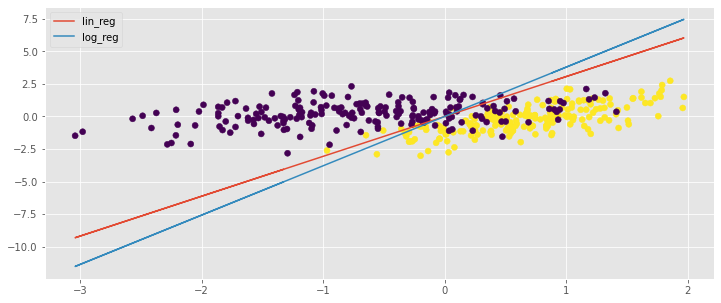

In [7]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

X = StandardScaler().fit_transform(X, y)

for clf in MySGDClassifier(batch_size=10, model_type='lin_reg').fit(X, y), \
           MySGDClassifier(batch_size=10, model_type='log_reg').fit(X, y):
    plot_decision_boundary(clf, X)

plt.legend()
plt.scatter(X[:,0], X[:,1], c=y);

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

X = StandardScaler().fit_transform(X)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

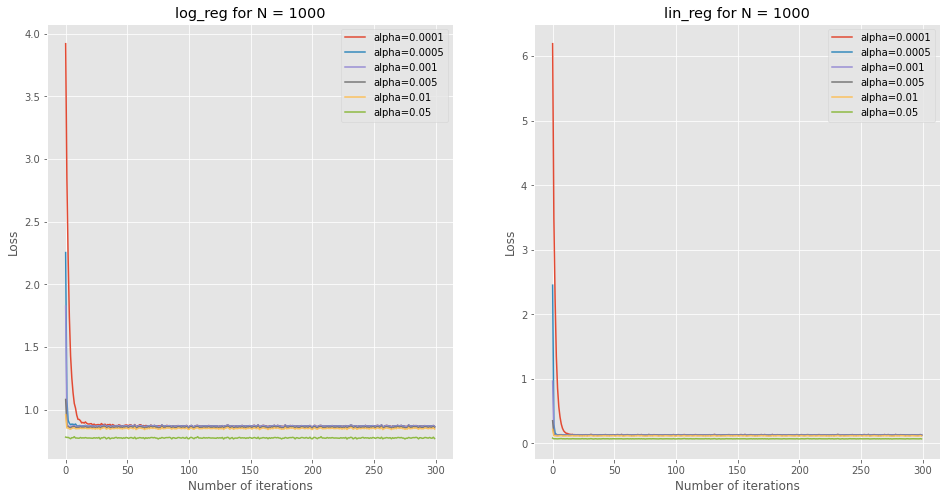

In [10]:
N = 1000
batch_size = 100
alphas = np.array([0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05])

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
models = ['log_reg', 'lin_reg']

for ax, model in zip(axes.flatten(), models):
    ax.set_title(f'{model} for N = {N}')
    ax.set(xlabel='Number of iterations', ylabel='Loss')
    for alpha in alphas:
        clf = MySGDClassifier(max_epoch=3,
                              batch_size=batch_size,
                              alpha=alpha, model_type=model).fit(X, y)
        losses = np.asarray(clf.errors_log['loss'])
        mean = np.asarray([
                np.mean(losses[i:i + N]) 
                for i in range(0, losses.shape[0], N)
        ])
        ax.plot(mean, label=f'alpha={alpha}')
        ax.legend(loc='upper right')  

plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

**Ответ:**
Заметно, что чем больше `alpha`, тем быстрее происходит сходимость. Но при росте `alpha` также растет и антиградиент, то есть мы начинаем перепрыгивать искомый минимум. Идеально брать `alpha` сначала побольше, а зачем уменьшать.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

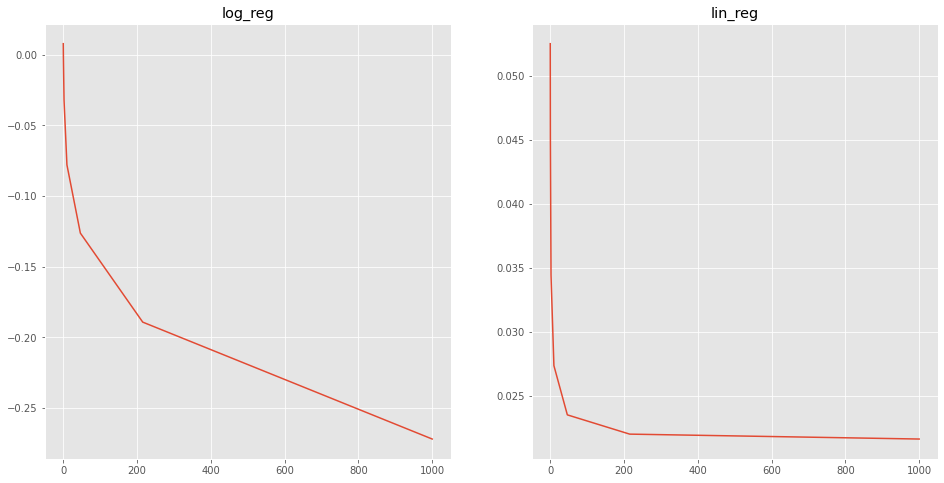

In [11]:
np.seterr(all='ignore')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
models = ['log_reg', 'lin_reg']
C = np.logspace(3, -3, 10)

for ax, model in zip(axes.flatten(), models):
    ax.set_title(f'{model}')
    w = []
    for c in C:
        clf = MySGDClassifier(max_epoch=1,
                              batch_size=50, alpha=0.05,
                              C=c, model_type=model).fit(X, y)
        w.append(np.mean(clf.weights))
    ax.plot(C, w)

plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [12]:
doc_to_title = {}
with open('data/docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [13]:
import pandas as pd
train_data = pd.read_csv('data/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [14]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X = np.array(X_train)
y = np.array(y_train)
groups = np.array(groups_train)
print (X.shape, y.shape, groups.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [15]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold

In [16]:
X = StandardScaler().fit_transform(X)
kf = GroupKFold(n_splits=5)

In [17]:
batches = [2 ** i for i in range(8)]

scores = dict()

for model in ['lin_reg', 'log_reg']:
    scores[model] = list()
    for batch in batches:
        for train, test in kf.split(X, y, groups=groups):
            clf = MySGDClassifier(batch_size=batch,
                                  model_type=model).fit(X[train], y[train])
            scores[model].append(f1_score(clf.predict(X[test]), y[test]))

KeyboardInterrupt: 

In [ ]:
batches[np.argmax(scores['lin_reg'])]

In [ ]:
batches[np.argmax(scores['log_reg'])]

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [ ]:
def ValScore(n_splits=5, groups=groups, *args, **kwargs):
    clf = MySGDClassifier(*args, **kwargs)
    kf = GroupKFold(n_splits=n_splits)

    scores = []
    for train, test in kf.split(X, y, groups=groups):
        clf.fit(X[train], y[train])
        scores.append(f1_score(y_pred=my_clf.predict(X[test]),
                               y_true=y[test]))
    return np.asarray(scores)

In [ ]:
opt_params = {
    'batch_size': 32
}

In [ ]:
def FindParams(param_name, param_range, known_params=opt_params):
    mean_scores = []

    for param in param_range:
        kwargs = known_params
        kwargs.update({param_name: param})
        scores = ValScore(**kwargs)
        mean_scores.append(scores.mean())

    opt_param = param_range[np.argmax(mean_scores)]

    plt.figure(figsize=(10, 6))
    plt.xlabel(param_name)
    plt.ylabel('score')
    plt.title(f'Зависимость f1-score от параметра {param_name}\n'
              f'Оптимальное значение параметра {param_name}: {opt_param}')
    plt.plot(param_range, mean_scores)

    return opt_param

In [ ]:
model_type_range = ['lin_reg', 'log_reg']
opt_model_type = FindParams('model_type', model_type_range)
opt_params.update({'model_type': opt_model_type})

In [ ]:
alpha_range = [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1]
opt_alpha = FindParams('alpha', alpha_range)
opt_params.update({'alpha': opt_alpha})

In [ ]:
C_range = np.logspace(3, -3, 10)
opt_C = FindParams('C', C_range)
opt_params.update({'C': opt_C})

In [ ]:
max_epoch_range = range(1, 31)
opt_max_epoch = FindParams('max_epoch', max_epoch_range)
opt_params.update({'max_epoch': opt_max_epoch})

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [ ]:
threshold_range = np.arange(0.1, 1, 0.05)
opt_threshold = FindParams('threshold', threshold_range)
opt_params.update({'threshold': opt_threshold})

In [ ]:
opt_params

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [ ]:
test_data = pd.read_csv('test_groups.csv')
test_groups_titledata = {}
for i in range(len(test_data)):
    new_doc_test = test_data.iloc[i]
    doc_group_test = new_doc_test['group_id']
    doc_id_test = new_doc_test['doc_id']
    title_test = doc_to_title[doc_id_test]
    if doc_group_test not in test_groups_titledata:
        test_groups_titledata[doc_group_test] = []
    test_groups_titledata[doc_group_test].append((doc_id_test, title_test))

X_test = []
pairs_id = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, pair_id, title) in enumerate(docs):
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            *_, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
        pairs_id.append(pair_id)
X_test = np.array(X_test)
print(X_test.shape)

In [ ]:
clf = MySGDClassifier(**opt_params).fit(X, y)
y_pred = clf.predict(X_test)

In [ ]:
df = pd.DataFrame()
df['pair_id'] = pairs_id
df['target'] = pred

df.to_csv("data/result.csv", header=True, index=False)

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***